In [1]:
import pandas as pd
fd_dataset=pd.read_csv('./all_output_train.csv',index_col=['TIMESTAMP'], parse_dates=['TIMESTAMP'])


In [2]:
fd_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75975 entries, 2022-01-13 22:56:44 to 2022-12-01 02:56:51
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             75975 non-null  float64
 1   11_LEFT_SHOULDER_X   75975 non-null  float64
 2   11_LEFT_SHOULDER_Y   75975 non-null  float64
 3   12_RIGHT_SHOULDER_X  75975 non-null  float64
 4   12_RIGHT_SHOULDER_Y  75975 non-null  float64
 5   13_LEFT_ELBOW_X      75975 non-null  float64
 6   13_LEFT_ELBOW_Y      75975 non-null  float64
 7   14_RIGHT_ELBOW_X     75975 non-null  float64
 8   14_RIGHT_ELBOW_Y     75975 non-null  float64
 9   15_LEFT_WRIST_X      75975 non-null  float64
 10  15_LEFT_WRIST_Y      75975 non-null  float64
 11  16_RIGHT_WRIST_X     75975 non-null  float64
 12  16_RIGHT_WRIST_Y     75975 non-null  float64
 13  23_LEFT_HIP_X        75975 non-null  float64
 14  23_LEFT_HIP_Y        75975 non-null  float64
 15  2

In [3]:
columns=fd_dataset.columns
print(columns[1:24])

Index(['11_LEFT_SHOULDER_X', '11_LEFT_SHOULDER_Y', '12_RIGHT_SHOULDER_X',
       '12_RIGHT_SHOULDER_Y', '13_LEFT_ELBOW_X', '13_LEFT_ELBOW_Y',
       '14_RIGHT_ELBOW_X', '14_RIGHT_ELBOW_Y', '15_LEFT_WRIST_X',
       '15_LEFT_WRIST_Y', '16_RIGHT_WRIST_X', '16_RIGHT_WRIST_Y',
       '23_LEFT_HIP_X', '23_LEFT_HIP_Y', '24_RIGHT_HIP_X', '24_RIGHT_HIP_Y',
       '25_LEFT_KNEE_X', '25_LEFT_KNEE_Y', '26_RIGHT_KNEE_X',
       '26_RIGHT_KNEE_Y', '27_LEFT_ANKLE_X', '27_LEFT_ANKLE_Y',
       '28_RIGHT_ANKLE_X'],
      dtype='object')


In [4]:
columns=fd_dataset.columns
print (columns)

Index(['Duration', '11_LEFT_SHOULDER_X', '11_LEFT_SHOULDER_Y',
       '12_RIGHT_SHOULDER_X', '12_RIGHT_SHOULDER_Y', '13_LEFT_ELBOW_X',
       '13_LEFT_ELBOW_Y', '14_RIGHT_ELBOW_X', '14_RIGHT_ELBOW_Y',
       '15_LEFT_WRIST_X', '15_LEFT_WRIST_Y', '16_RIGHT_WRIST_X',
       '16_RIGHT_WRIST_Y', '23_LEFT_HIP_X', '23_LEFT_HIP_Y', '24_RIGHT_HIP_X',
       '24_RIGHT_HIP_Y', '25_LEFT_KNEE_X', '25_LEFT_KNEE_Y', '26_RIGHT_KNEE_X',
       '26_RIGHT_KNEE_Y', '27_LEFT_ANKLE_X', '27_LEFT_ANKLE_Y',
       '28_RIGHT_ANKLE_X', '28_RIGHT_ANKLE_Y', 'Event'],
      dtype='object')


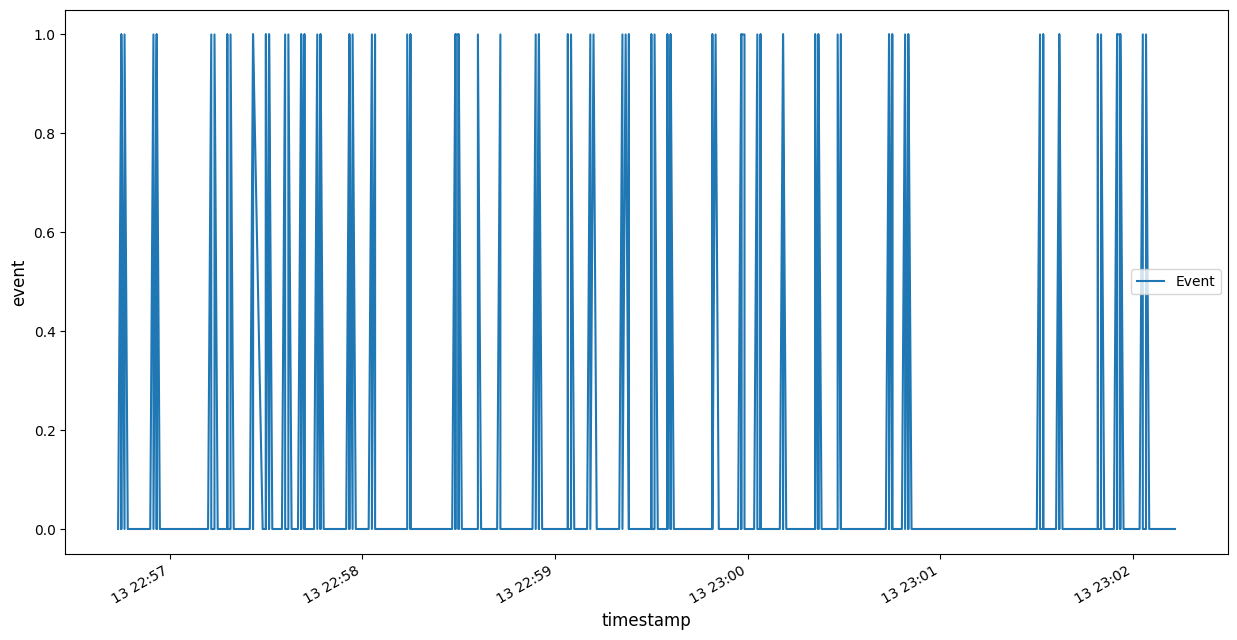

In [5]:
import matplotlib.pyplot as plt
fd_dataset['13/01/2022 22:56:44':'13/01/2022 23:02:13'].plot(y='Event',subplots=True,figsize=(15,8))
plt.xlabel('timestamp',fontsize=12)
plt.ylabel('event',fontsize=12)
plt.show()

array([<AxesSubplot: xlabel='TIMESTAMP'>,
       <AxesSubplot: xlabel='TIMESTAMP'>], dtype=object)

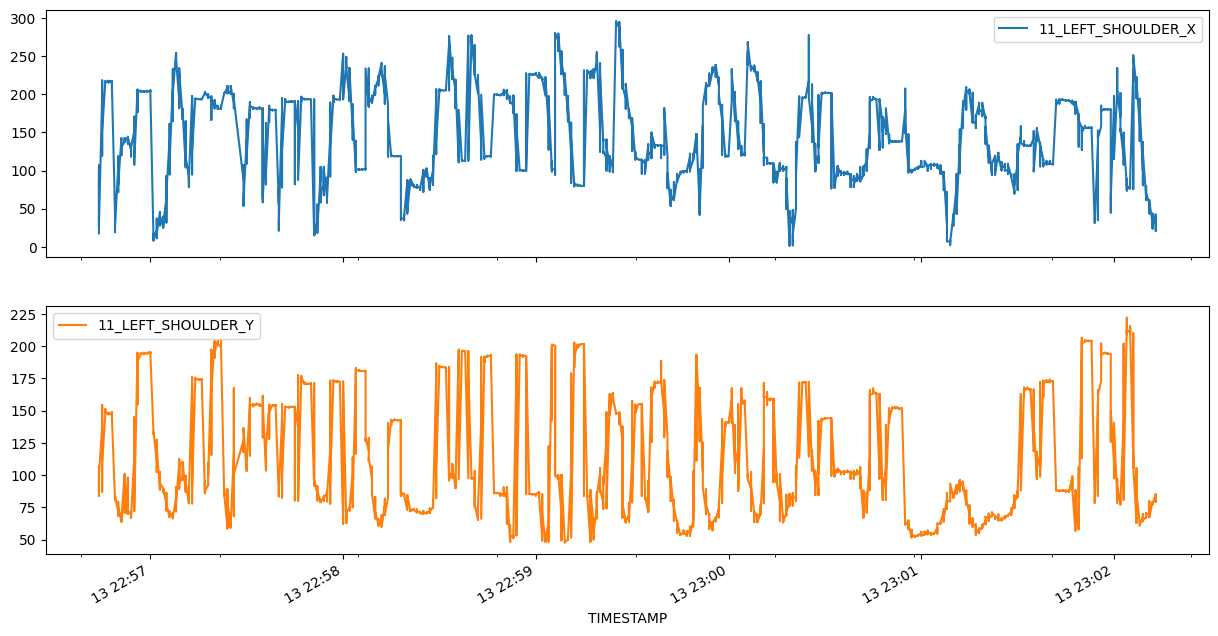

In [6]:
fd_dataset['13/01/2022 22:56:44':'13/01/2022 23:02:13'].plot(y=columns[1:3],subplots=True,figsize=(15,8))


In [7]:
train_size=int(fd_dataset.shape[0]*0.8)


In [8]:
train_X=fd_dataset.values[:train_size,0:25]
train_y=fd_dataset.values[:train_size,25]
test_X=fd_dataset.values[train_size+1:,0:25]
test_y=fd_dataset.values[train_size+1:,25]

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already loaded your time series dataset into train_X, train_y, test_X, and test_y

# Normalize the data using StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Assuming your train_X and test_X have the shape (num_samples, num_features)

# Reshape the data for LSTM input (assuming a single time step for each sample)
num_samples_train, num_features_train = train_X.shape
num_samples_test, num_features_test = test_X.shape

num_timesteps = 1  # Since it's a time series, we assume one time step for each sample

train_X = np.reshape(train_X, (num_samples_train, num_timesteps, num_features_train))
test_X = np.reshape(test_X, (num_samples_test, num_timesteps, num_features_test))

# Define and train the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(num_timesteps, num_features_train)))
model.add(Dense(1, activation='sigmoid'))

# Adjust the learning rate and other hyperparameters as needed
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(test_X)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(test_y, y_pred)
clf_report = classification_report(test_y, y_pred, zero_division=1)

print(f"Accuracy Score: {accuracy}")
print(clf_report)

Epoch 1/10
1710/1710 [==============================] - 7s 3ms/step - loss: 0.1423 - accuracy: 0.9432 - val_loss: 0.4059 - val_accuracy: 0.7942
Epoch 2/10
1710/1710 [==============================] - 5s 3ms/step - loss: 0.0933 - accuracy: 0.9657 - val_loss: 0.5024 - val_accuracy: 0.7904
Epoch 3/10
1710/1710 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9717 - val_loss: 0.7671 - val_accuracy: 0.7354
Epoch 4/10
1710/1710 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9760 - val_loss: 0.6851 - val_accuracy: 0.7660
Epoch 5/10
1710/1710 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9774 - val_loss: 0.7421 - val_accuracy: 0.7557
Epoch 6/10
1710/1710 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9792 - val_loss: 0.7227 - val_accuracy: 0.7702
Epoch 7/10
1710/1710 [==============================] - 4s 2ms/step - loss: 0.0544 - accuracy: 0.9803 - val_loss: 0.7307 - val_accuracy:

In [12]:
y_pred = model.predict(test_X)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(test_y, y_pred)
clf_report = classification_report(test_y, y_pred, zero_division=1)

print(f"Accuracy Score: {accuracy}")
print(clf_report)

# Compute the accuracy for the testing set
y_pred = model.predict(test_X)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy on testing set: {accuracy}")

475/475 [==============================] - 1s 1ms/step
Accuracy Score: 0.84296432802422
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91     14832
         1.0       0.10      0.73      0.18       362

    accuracy                           0.84     15194
   macro avg       0.55      0.79      0.55     15194
weighted avg       0.97      0.84      0.90     15194

475/475 [==============================] - 1s 1ms/step
Accuracy on testing set: 0.84296432802422


In [15]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam





scaler = StandardScaler()

num_samples_train, timesteps_train, num_features_train = train_X.shape
train_X = np.reshape(train_X, (num_samples_train * timesteps_train, num_features_train))
train_X = scaler.fit_transform(train_X)
train_X = np.reshape(train_X, (num_samples_train, timesteps_train, num_features_train))





# Normalize the data using StandardScaler for each feature across all time steps



if test_X is not None:
    num_samples_test, timesteps_test, num_features_test = test_X.shape
    test_X = np.reshape(test_X, (num_samples_test * timesteps_test, num_features_test))
    test_X = scaler.transform(test_X)
    test_X = np.reshape(test_X, (num_samples_test, timesteps_test, num_features_test))

# Define and train the Conv1D model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps_train, num_features_train)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(test_X)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(test_y, y_pred)
clf_report = classification_report(test_y, y_pred, zero_division=1)

print(f"Accuracy Score: {accuracy}")
print(clf_report)


ValueError: not enough values to unpack (expected 3, got 2)